In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("C:/Users/surya/DMT/data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [3]:
x = data.drop(["class"], axis = 1)
y = data["class"].values
#normalized data
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

x.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


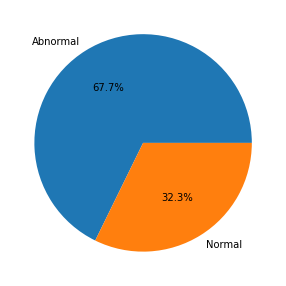

In [4]:
import seaborn as sns

rate = pd.Series(y).value_counts()
plt.figure(figsize=[5,5])
plt.pie(rate.values, explode = [0, 0], labels = rate.index,  autopct = "%1.1f%%")

In [5]:
plt.figure(figsize=[15,5])

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

C:\Users\surya\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<AxesSubplot:xlabel='variable', ylabel='value'>

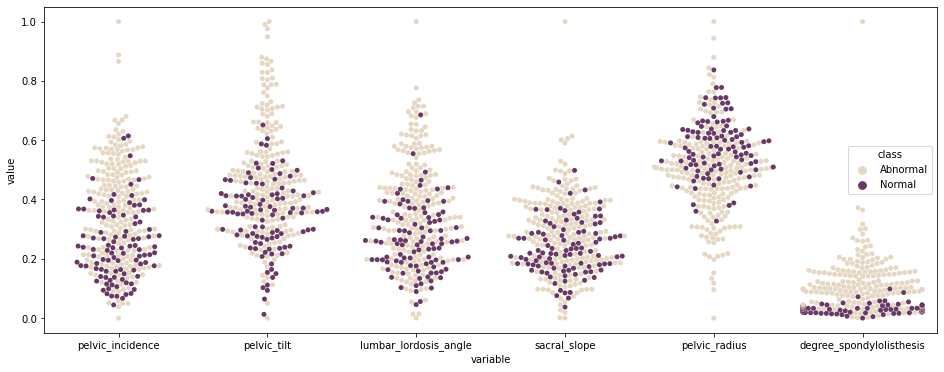

In [7]:
columns = list(x.columns)
df = x.copy()
df["class"] = y 
df = pd.melt(df, value_vars=columns, id_vars='class') 

plt.figure(figsize=(16,6))
pal = sns.cubehelix_palette(2, rot=.5, dark=.3)
sns.swarmplot(x="variable",y="value", hue="class", palette=pal, data=df)


In [8]:
y = np.array( [1 if each == "Abnormal" else 0 for each in y] )

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [10]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1), 0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [11]:
def forward_backward_propagation(w, b, x_train, y_train):
    #foward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1] # Bölme sebebi çıkan sonucu normalize etmek

    #backward propagation   
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost, gradients

In [16]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration):
    cost_list = [] 
    cost_list2 = [] 
    index = [] 
    

    for i in range(number_of_iteration):

        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost) 

        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i : %f" %(i, cost))
    
    parameters = {"weight" : w, "bias" : b} 
    

    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list 

In [17]:
def predict(w, b, x_test):

    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1])) 
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    return Y_prediction

In [18]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    dimension = x_train.shape[0] #
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    
    print("My Test Accuracy : {} %" .format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return y_prediction_test

Test Accuracy According To (Sklearn)Logistic Reg: 77.41935483870968


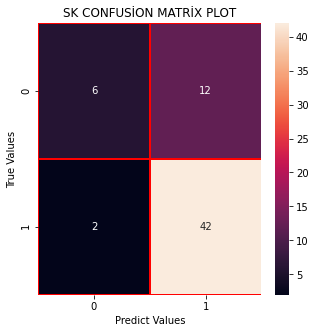

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)

y_sk_predict =  lr.predict(x_test.T)


lr_score = lr.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To (Sklearn)Logistic Reg: {}".format(lr_score))

sk_cm = confusion_matrix(y_test, y_sk_predict)

plt.figure(figsize=(5,5))
sns.heatmap(sk_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title("SK CONFUSİON MATRİX PLOT")
plt.show()

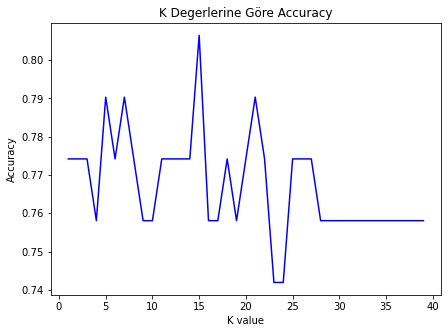

Test Accuracy According To KNN(K=15): 80.64516129032258


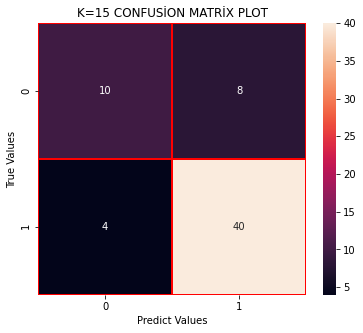

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_score = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train.T, y_train.T)
    knn_score.append( knn.score(x_test.T, y_test.T) )

df = pd.DataFrame(knn_score)
plt.figure(figsize=(7,5))
plt.plot(df.index+1, df.values, color="blue")
plt.title("K Degerlerine Göre Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train.T, y_train.T)
y_knn_predict = knn.predict(x_test.T)

knn_score = knn.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To KNN(K=15): {}".format(knn_score))

knn_cm = confusion_matrix(y_test, y_knn_predict)

plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title("K=15 CONFUSİON MATRİX PLOT")
plt.show()

Test Accuracy According To SVM : 80.64516129032258


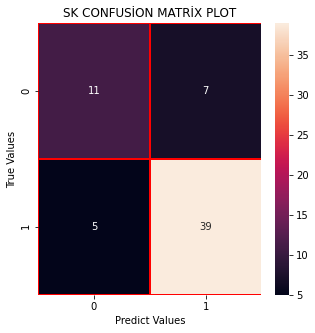

In [22]:
from sklearn.svm import SVC

svm = SVC(random_state = 42)
svm.fit(x_train.T, y_train.T)

svm_score = svm.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To SVM : {}".format(svm_score))

svm_predict = svm.predict(x_test.T)

svm_cm = confusion_matrix(y_test, svm_predict)

plt.figure(figsize=(5,5))
sns.heatmap(svm_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title("SK CONFUSİON MATRİX PLOT")
plt.show()

Test Accuracy According To Naive Bayes : 79.03225806451613


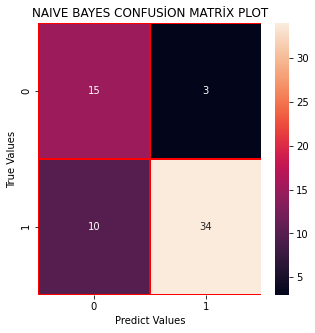

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

nb_score = nb.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To Naive Bayes : {}".format(nb_score))

nb_predict = nb.predict(x_test.T)

nb_cm = confusion_matrix(y_test, nb_predict)

plt.figure(figsize=(5,5))
sns.heatmap(nb_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title("NAIVE BAYES CONFUSİON MATRİX PLOT")
plt.show()

Test Accuracy According To Decision Tree : 77.41935483870968


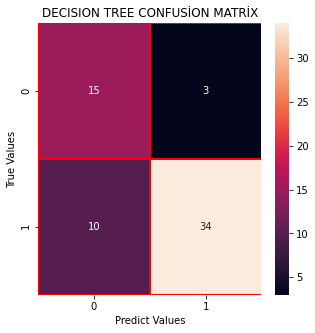

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train.T, y_train.T)

dt_score = dt.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To Decision Tree : {}".format(dt_score))


dt_predict = dt.predict(x_test.T)

dt_cm = confusion_matrix(y_test, nb_predict)

plt.figure(figsize=(5,5))
sns.heatmap(dt_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title("DECISION TREE CONFUSİON MATRİX")
plt.show()

Test Accuracy According To Random Forest Algorithm : 82.25806451612904


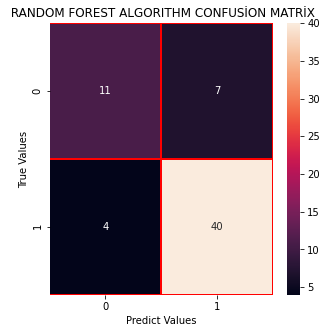

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=1)
rf.fit(x_train.T, y_train.T)

rf_score = rf.score(x_test.T, y_test.T) * 100
print("Test Accuracy According To Random Forest Algorithm : {}".format(rf_score))

rf_predict = rf.predict(x_test.T)


rf_cm = confusion_matrix(y_test, rf_predict)

plt.figure(figsize=(5,5))
sns.heatmap(rf_cm, annot = True, linewidth = 0.5, linecolor="red", fmt = ".0f")
plt.xlabel("Predict Values")
plt.ylabel("True Values")
plt.title(" RANDOM FOREST ALGORITHM CONFUSİON MATRİX")
plt.show()

In [26]:
trace = go.Bar(
    x=['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    y=[lr_score, knn_score, svm_score, nb_score, dt_score, rf_score],
    marker=dict(color=['#008BF8', '#0FFF95', '#EE6C4D', '#A30000', '#2081C3', '#FF7700']),
)

layout = go.Layout(
    title='Accuracy Comparison The All Algorithms',
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)